In [1]:
from APT_importers import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
d = read_epos('example-data/voldata.epos')

In [3]:
# isolate multiples
m = d[d.ipp != 1].copy()

In [4]:
# assign id number to multiples
m.loc[:,'id'] = m.ipp.cumsum()

In [15]:
# label each hit multiple
def hitlabel(d):
    d.loc[:,'hn'] = range(len(d))
    return d

mg = m.groupby('id')

m = mg.apply(hitlabel)

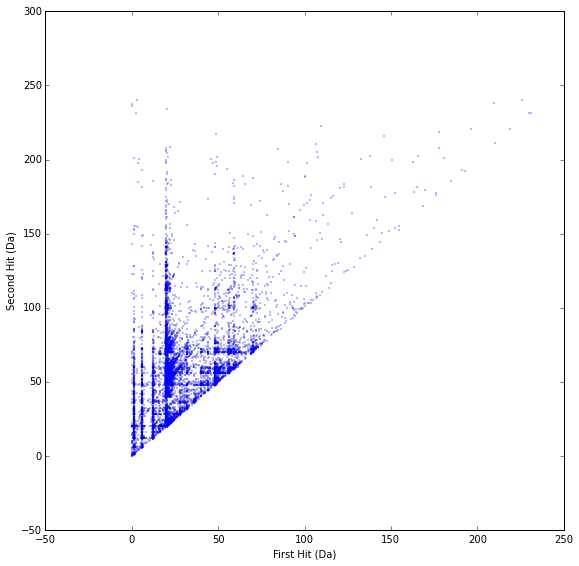

In [76]:
# plot single masses vs second masses
fig = plt.figure(figsize=[9,9])
ax = fig.add_axes([.1,.1,.8,.8])

ax.scatter(m.loc[m.hn==0,'Da'],m.loc[m.hn==1,'Da'], alpha=0.3, s=5, lw=0)
ax.set_xlabel('First Hit (Da)')
ax.set_ylabel('Second Hit (Da)')
# ax.set_xlim(0,150)
# ax.set_ylim(0,150)

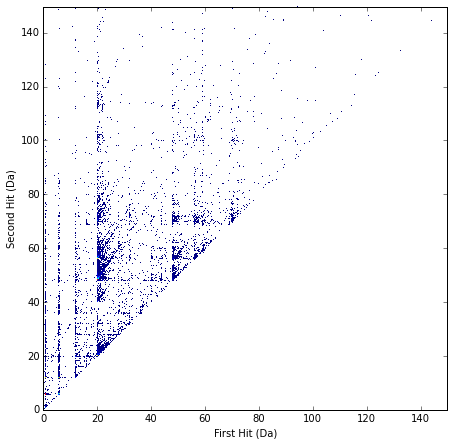

In [119]:
fig = plt.figure(figsize=[7,7])
ax = fig.add_axes([.1,.1,.8,.8])

cmap = plt.cm.jet
cmap.set_bad('w')
cmap.set_under('w')
cmap.set_over('r')

h2d = ax.hist2d(m.loc[m.hn==0,'Da'],m.loc[m.hn==1,'Da'],bins=np.arange(0,150,0.3), vmin=0.0000001, vmax=500)

ax.set_xlabel('First Hit (Da)')
ax.set_ylabel('Second Hit (Da)')
# ax.set_xlim(0,150)
# ax.set_ylim(0,150)

fig.savefig('hit_hist.pdf')

In [80]:
im.shape

(3000, 3000)